<a href="https://colab.research.google.com/github/brunelliMichele/py.tatine/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

create a search engine

Architecture: VGG16 (CNN)
- pre-trained on ImageNet
- representation of images through feature vector

Example: takes an image and outputs a 512 output vector.
all images in the dataset are converted to these 512 length vector and stored.
the query image also becomes a 512-length vector.
test image is matched with all other image representations, and compared with Cosine Similarity (here)

Cosine Sim: comparison of the direction of the vectors (how "aligned" they are). dot product of the values of the vectors divided by  ??


- full align= 1
- no align = 0 (they are perpendicular, no similarity)
- opposite= -1 (opposite)


512dim vectors are mapped to 3 most important dimension using PCA (useful for visualization)

when the dataset is too big, instead of comparing every image, it is more efficient to create an efficient index structure. (FAISS)








In [1]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/competition_ML/training"

Mounted at /content/drive


In [2]:
import numpy as np
from numpy import linalg as LA

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from  tensorflow.keras.applications.vgg16 import preprocess_input

class VGGNet:
    def __init__(self):
        # weights: 'imagenet'
        # pooling: 'max' or 'avg'
        # input_shape: (width, height, 3), width and height should >= 48
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))


    '''
    Use vgg16 model to extract features
    Output normalized feature vector
    '''
    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feat = self.model.predict(img)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

In [3]:
# prompt: correct the code so that it has access to the images stored in the three folder inside the "training" folder specified in the "dataset_path" variable

from google.colab import drive
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from  tensorflow.keras.applications.vgg16 import preprocess_input
import os

# create a search engine
# ... (Your comments)

drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/competition_ML/training"


class VGGNet:
    def __init__(self):
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))

    def extract_feat(self, img_path):
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feat = self.model.predict(img)
        norm_feat = feat[0]/LA.norm(feat[0])
        return norm_feat

    def extract_features_from_directory(self, directory):
      features = {}
      for subdir, _, files in os.walk(directory):
        for file in files:
          if file.lower().endswith(('.png', '.jpg', '.jpeg')): # Add more image extensions if needed
            img_path = os.path.join(subdir, file)
            try:
              features[img_path] = self.extract_feat(img_path)
            except Exception as e:
              print(f"Error processing {img_path}: {e}")
      return features


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import h5py
import numpy as np
#from VGG_feature_extractor import VGGNet

images_path =dataset_path
img_list = [os.path.join(images_path,f) for f in os.listdir(images_path)]


print("  start feature extraction ")


model = VGGNet()

path = dataset_path
feats = []
names = []

for im in os.listdir(path):
    print("Extracting features from image - ", im)
    X = model.extract_features_from_directory(os.path.join(path, im))  # Join path correctly

    # Convert features to a NumPy array with a compatible dtype
    for img_path, feature in X.items():
        feats.append(feature)  # Append individual feature vectors
        names.append(os.path.relpath(img_path, path))  # Store relative image paths

feats = np.array(feats, dtype=np.float32)  # Convert to float32


# directory for storing extracted features
output = "CNNFeatures.h5"

print(" writing feature extraction results to h5 file")

try:
    h5f = h5py.File(output, 'w')
    h5f.create_dataset('dataset_1', data=feats)
    h5f.create_dataset('dataset_2', data=np.bytes_(names))  # Use np.string_ instead of np.bytes_
    h5f.close()
except OSError as e:
    print(f"Error creating/writing to HDF5 file: {e}")
    print("Make sure the file is not open in any other process.")

  start feature extraction 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracting features from image -  .DS_Store
Extracting features from image -  American_chameleon
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Extracting features from image -  Arctic_fox
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━

In [6]:
# directory for storing extracted features
output = "CNNFeatures.h5"

print(" writing feature extraction results to h5 file")

# Open the HDF5 file in append mode ('a')
with h5py.File(output, 'a') as h5f:
    # If the datasets already exist, overwrite them.
    # If they don't exist, they will be created.
    if 'dataset_1' in h5f:
        del h5f['dataset_1']
    if 'dataset_2' in h5f:
        del h5f['dataset_2']
    h5f.create_dataset('dataset_1', data=feats)
    h5f.create_dataset('dataset_2', data=np.bytes_(names))

print("Feature extraction results saved to", output)


 writing feature extraction results to h5 file
Feature extraction results saved to CNNFeatures.h5


In [7]:
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def plot_feature_space(features, query_feat, top_matches, imgNames, title="Feature Space Visualization"):
    """Visualize high-dimensional features in 3D using PCA"""
    # Apply PCA to reduce dimensions to 3
    pca = PCA(n_components=3)
    # Combine query and database features
    all_features = np.vstack([features, query_feat.reshape(1, -1)])
    features_3d = pca.fit_transform(all_features)

    # Split back into database and query
    db_features_3d = features_3d[:-1]
    query_feature_3d = features_3d[-1]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot all database points
    ax.scatter(db_features_3d[:, 0], db_features_3d[:, 1], db_features_3d[:, 2],
              c='blue', alpha=0.5, label='Database features')

    # Plot query point
    ax.scatter(query_feature_3d[0], query_feature_3d[1], query_feature_3d[2],
              c='red', s=100, label='Query image')

    # Plot top matches
    matches_3d = db_features_3d[top_matches]
    ax.scatter(matches_3d[:, 0], matches_3d[:, 1], matches_3d[:, 2],
              c='green', s=100, label='Top matches')

    # Add labels for top matches
    for i, match_idx in enumerate(top_matches):
        img_name = imgNames[match_idx].decode('utf-8') if isinstance(imgNames[match_idx], bytes) else imgNames[match_idx]
        ax.text(matches_3d[i, 0], matches_3d[i, 1], matches_3d[i, 2], f'{i+1}. {img_name}')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Your existing code...
h5f = h5py.File("CNNFeatures.h5", 'r')
feats = h5f['dataset_1'][:]
imgNames = h5f['dataset_2'][:]
h5f.close()

# Randomly select an image from the dataset as the query image
random_index = random.randint(0, len(imgNames) - 1)
queryImg = imgNames[random_index].decode('utf-8')  # Get the path of the random image
queryImg = os.path.join(dataset_path, queryImg)
model = VGGNet()
query_feat = model.extract_feat(queryImg)

scores = []
from scipy import spatial
for i in range(feats.shape[0]):
    score = 1-spatial.distance.cosine(query_feat, feats[i])
    scores.append(score)
scores = np.array(scores)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]

# Get top 3 matches
top_n = 5
top_matches = rank_ID[:top_n]
top_scores = rank_score[:top_n]

# Print matches
print(f"Top {top_n} matches with similarity scores:")
for i, (image_id, score) in enumerate(zip(top_matches, top_scores)):
    image_name = imgNames[image_id].decode('utf-8') if isinstance(imgNames[image_id], bytes) else imgNames[image_id]
    print(f"{i+1}. Image: {image_name}, Score: {score:.4f}")

# Visualize feature space
#plot_feature_space(feats, query_feat, top_matches, imgNames,
 #                 "VGG16 Feature Space - Image Retrieval Results")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Top 5 matches with similarity scores:
1. Image: American_chameleon/n01682714_8412.jpg, Score: 1.0000
2. Image: American_chameleon/n01682714_10699.jpg, Score: 0.7527
3. Image: American_chameleon/n01682714_21745.jpg, Score: 0.7399
4. Image: American_chameleon/n01682714_14702.jpg, Score: 0.7394
5. Image: American_chameleon/n01682714_10338.jpg, Score: 0.7329


Top 3 matches with similarity scores:
1. Image: American_chameleon/n01682714_8412.jpg, Score: 1.0000
2. Image: American_chameleon/n01682714_10699.jpg, Score: 0.7527
3. Image: American_chameleon/n01682714_21745.jpg, Score: 0.7399


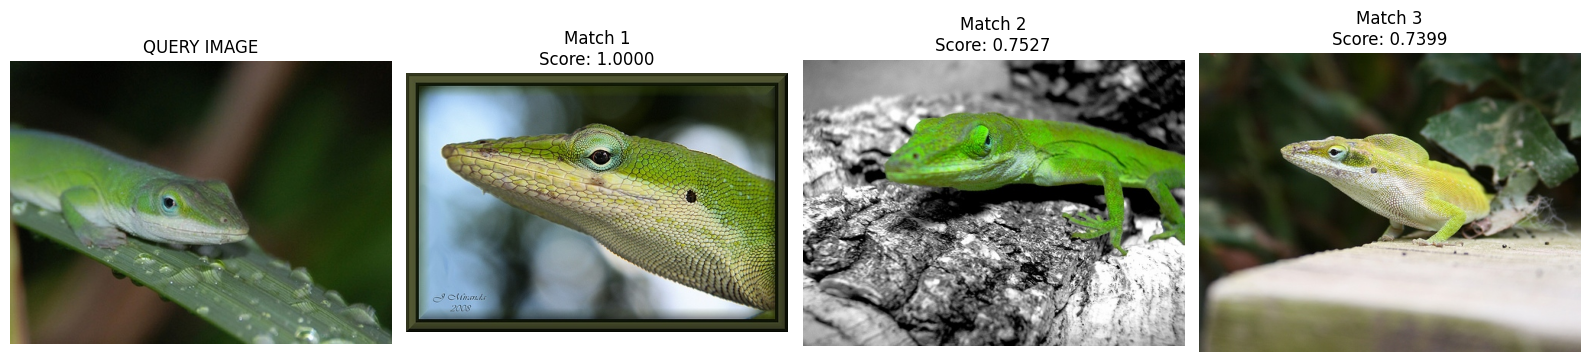

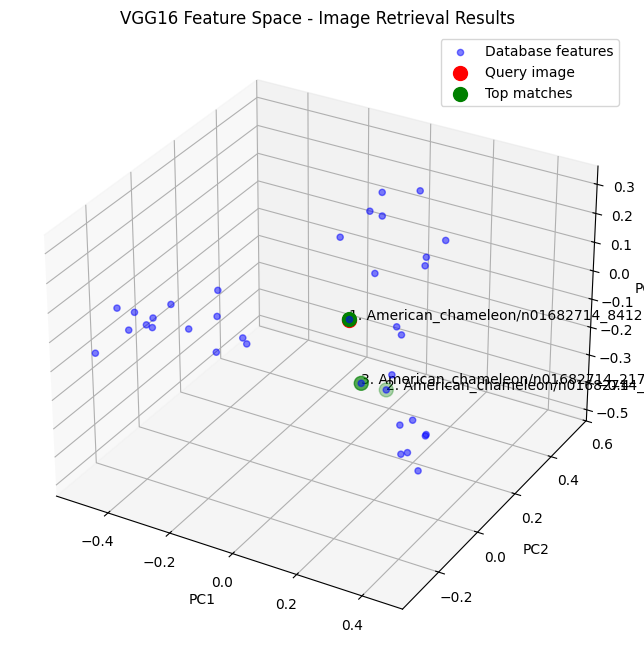

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os  # Make sure os is imported

def display_images(image_paths, titles=None):
    """Displays multiple images using matplotlib."""
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(4*num_images, 5))  # Adjust width per image

    # Handle case when there's only one image (axes is not iterable)
    if num_images == 1:
        axes = [axes]

    for i, image_path in enumerate(image_paths):
        try:
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            title = titles[i] if titles and i < len(titles) else os.path.basename(image_path)
            axes[i].set_title(title)
        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}")
            axes[i].axis('off')
            axes[i].set_title("Image not found")

    plt.tight_layout()
    plt.show()


# ... (Your existing code) ...

# Get top 5 matches
top_n = 3
top_matches = rank_ID[:top_n]
top_scores = rank_score[:top_n]

# Get query image path
query_image_name = imgNames[image_id].decode('utf-8') if isinstance(imgNames[image_id], bytes) else imgNames[image_id]
query_image_path = os.path.join(dataset_path, query_image_name)

# Prepare list of image paths and titles
image_paths_to_display = [query_image_path]  # Start with query image
titles = ["QUERY IMAGE"]

print(f"Top {top_n} matches with similarity scores:")
for i, (image_id, score) in enumerate(zip(top_matches, top_scores)):
    image_name = imgNames[image_id].decode('utf-8') if isinstance(imgNames[image_id], bytes) else imgNames[image_id]
    full_image_path = os.path.join(dataset_path, image_name)
    print(f"{i+1}. Image: {image_name}, Score: {score:.4f}")
    image_paths_to_display.append(full_image_path)
    titles.append(f"Match {i+1}\nScore: {score:.4f}")

# Display images
display_images(image_paths_to_display, titles)

# Optional: Visualize feature space
plot_feature_space(feats, query_feat, top_matches, imgNames,
                   "VGG16 Feature Space - Image Retrieval Results")


In [9]:
# Paths to query and gallery datasets
query_dataset_path = "/content/drive/MyDrive/competition_ML/test/query"
gallery_dataset_path = "/content/drive/MyDrive/competition_ML/test/gallery"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step

Query Image: 4597118805213184.jpg
1. Image: painting_085_000118.jpg, Score: 0.4245
2. Image: painting_085_000045.jpg, Score: 0.3670
3. Image: n01855672_1037.jpg, Score: 0.2811


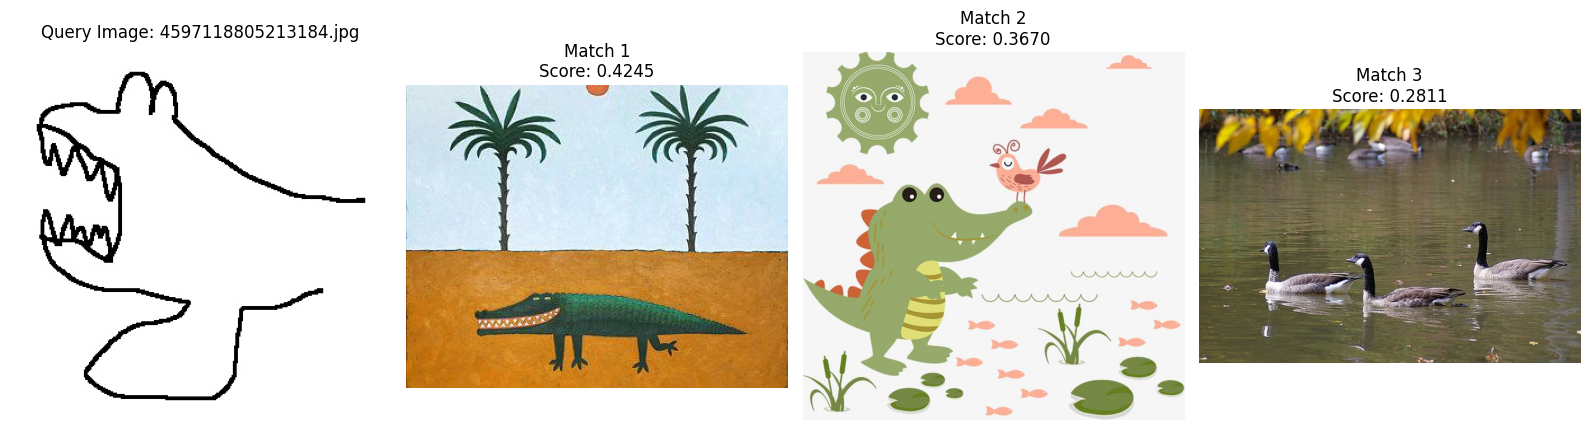

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step

Query Image: n01855672_10973.jpg
1. Image: n01855672_4197.jpg, Score: 0.6578
2. Image: n01855672_1037.jpg, Score: 0.5846
3. Image: n01855672_4393.jpg, Score: 0.5057


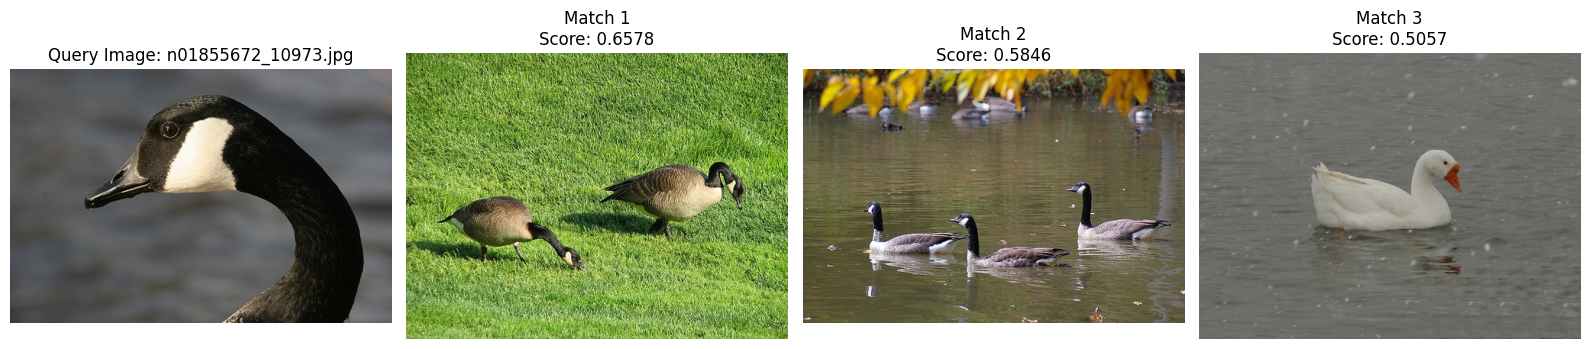

In [10]:
# prompt: i want to use the functions i defined before to perform the same analysis, but the query image must come from the "query dataset path" and the gallery to find matches from the "gallery dataset path"

# ... (Your existing code) ...

def perform_image_search(query_dataset_path, gallery_dataset_path):
    """Performs image search using the provided query and gallery datasets."""

    model = VGGNet()

    # Extract features from the gallery dataset
    gallery_features = model.extract_features_from_directory(gallery_dataset_path)
    gallery_feats = np.array(list(gallery_features.values()), dtype=np.float32)
    gallery_imgNames = np.array(list(gallery_features.keys()))


    # Process each query image
    for query_image_name in os.listdir(query_dataset_path):
        if query_image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            query_image_path = os.path.join(query_dataset_path, query_image_name)
            query_feat = model.extract_feat(query_image_path)

            # Calculate cosine similarity scores between query and gallery images
            scores = []
            for i in range(gallery_feats.shape[0]):
                score = 1 - spatial.distance.cosine(query_feat, gallery_feats[i])
                scores.append(score)
            scores = np.array(scores)
            rank_ID = np.argsort(scores)[::-1]
            rank_score = scores[rank_ID]

            # Get top matches
            top_n = 3
            top_matches = rank_ID[:top_n]
            top_scores = rank_score[:top_n]

            # Display results
            print(f"\nQuery Image: {query_image_name}")
            image_paths_to_display = [query_image_path]
            titles = [f"Query Image: {query_image_name}"]
            for i, (image_id, score) in enumerate(zip(top_matches, top_scores)):
                image_name = gallery_imgNames[image_id]
                print(f"{i + 1}. Image: {os.path.basename(image_name)}, Score: {score:.4f}")
                image_paths_to_display.append(image_name)
                titles.append(f"Match {i+1}\nScore: {score:.4f}")
            display_images(image_paths_to_display, titles)

# Example usage:
perform_image_search(query_dataset_path, gallery_dataset_path)
